# 
### Calculation for fixed point in model between EKE and APE

\begin{equation} \frac{dE}{dt} = \mathcal X E  \end{equation}
\begin{equation}  \rightarrow E = e^{\pm i \omega t} \text{    where   } \omega = \sqrt{ab/2} \end{equation}

In [1]:
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
rc('xtick', labelsize=26) #20 
rc('ytick', labelsize=26) #20
rc('axes', titlesize=26)    # fontsize of the axes title
rc('axes', labelsize=26) #24  
rc('font', **{'size':26})

In [2]:
H =  3000 #ASC[m]  ### ACC rho = 1026.89 drho = 1.2 H  = 2000 
#ACC values -- give freq of 420days but ACC so dynamics will be differnt!
drho = 0.1 #original--> before used 0.5 for diff relative to AABW layer
Hrho = 1000 ## combined height of top two layers to use for buoyancy frequency calculation

drho_dz = -drho/(Hrho/2)
f = -1e-4
g = 9.81
rho0 = 1027.8 #[kg/m^3
tau = 0.05
gp = drho/rho0 *g
print(gp)
#htop = 200 #[m] height of top layer thickness

Nsquared = - g/rho0 * drho_dz

0.0009544658493870405


In [3]:
Nsquared

1.908931698774081e-06

In [4]:
Ly = 200e3 #np.sqrt(Nsquared) * H /f #2e4 #7e3 #rossby deformation radius
print(Ly)

a = (2* abs(f) *gp /(f*np.sqrt(Nsquared)*H)) *np.sqrt(6/(rho0*gp*Ly**3))
a

200000.0


-1.2734153133564038e-11

In [5]:
b = (2*tau*gp*Ly/f) *np.sqrt(6/(rho0*gp*Ly**3))
b

-0.005278208207829867

In [6]:
def APE_predict(cdrag):
    a = (2* abs(f) *gp /(f*np.sqrt(Nsquared)*H)) *np.sqrt(6/(rho0*gp*Ly**3))
    APE  = (cdrag/a)**2
    return APE

In [7]:
def E_predict(tau):
    b = (2*tau*gp*Ly/f) *np.sqrt(6/(rho0*gp*Ly**3))
    a = (2* abs(f) *gp /(f*np.sqrt(Nsquared)*H)) *np.sqrt(6/(rho0*gp*Ly**3))
    E = b/a
    return E

In [8]:
#import nc files of fft period

In [9]:
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt


In [10]:
from dask.distributed import Client

c=Client(local_directory = '/scratch/e14/qo9901/') 
c 
import gc

In [11]:
def APE_equil(filename):
    APE_time = xr.open_mfdataset(filename)
    APE_equil_mag = APE_time.mean(dim = 'Time')
    print(APE_equil_mag.e.values)
    return APE_equil_mag.e.values

In [ ]:
fn = '/g/data/v45/qo9901/magnitude_wind_APE.nc'
ds = nc.Dataset(fn, 'w', format='NETCDF4')

In [ ]:
wind_exp = ds.createDimension('wind_exp',4)
wind_exps = ds.createVariable('wind_exp', 'f4', ('wind_exp',))
value = ds.createVariable('value', 'f4', ('wind_exp',))

In [51]:
value[0] = APE_equil('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau2p5e-02_sig1p0e+02_APE.nc')
c.run(gc.collect)
value[1] = APE_equil('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau5p0e-02_sig1p0e+02_APE.nc')
c.run(gc.collect)
value[2] = APE_equil('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau7p5e-03_sig1p0e+02_APE.nc')
c.run(gc.collect)
value[3] = APE_equil('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_APE.nc')


1231827500.0
1524783700.0
1642843900.0
1879204200.0


In [52]:
ds.close()

In [53]:
fn = '/g/data/v45/qo9901/magnitude_drag_APE.nc'
ds = nc.Dataset(fn, 'w', format='NETCDF4')

In [54]:
cdrag_exp = ds.createDimension('cdrag_exp',4)
cdrag_exps = ds.createVariable('cdrag_exp', 'f4', ('cdrag_exp',))
value = ds.createVariable('value', 'f4', ('cdrag_exp',))

In [ ]:
value[0] = APE_equil('4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag1p5e-03_APE.nc')
c.run(gc.collect)
value[1] = APE_equil('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_APE.nc')
c.run(gc.collect)
value[2] = APE_equil('4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag3p6e-03_APE.nc')
c.run(gc.collect)
value[3] = APE_equil('4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag6p0e-03_APE.nc')


In [56]:
ds.close()

Text(0.5, 1.0, 'Energy diagnostics from MOM6 ASC experiments')

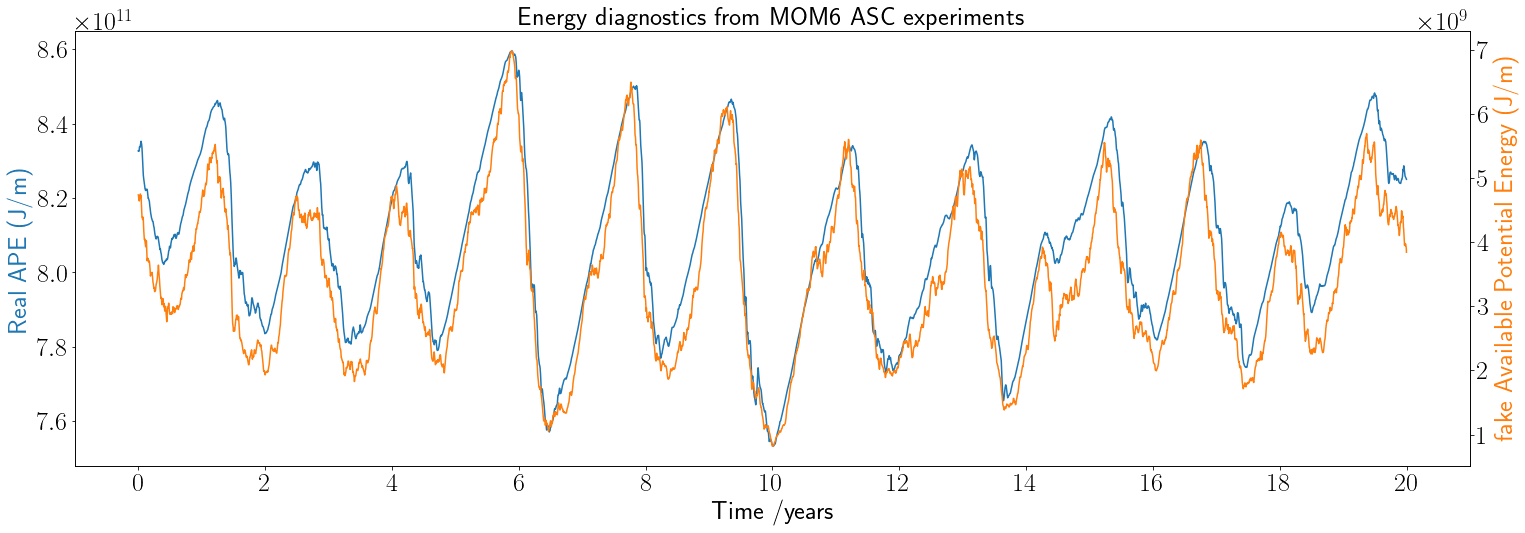

In [31]:
plt.figure(figsize = (25,8))
ax1 = plt.subplot()

ax1.plot((EKE_time.coords['Time'].values-51),APE_cdw_time2.e.values, color = 'C0')
#ax1.set_ylim([-0.4e11,0.51e11])
ax1.set_ylabel('Real APE (J/m)', color = 'C0')
#ax1.set_yticks(np.arange(-0.4e11,0.51e11,1e10))

ax2 = ax1.twinx()
ax2.plot((EKE_time.coords['Time'].values-51),APE_cdw_time.e.values, color = 'C1')
ax2.set_ylabel('fake Available Potential Energy (J/m)', color = 'C1')
#ax2.set_ylim([1.37e12,1.46e12])
#ax2.set_yticks(np.arange(1.37e12,1.46e12,1e10))
plt.xticks(np.arange(0,22,2))
ax1.set_xlabel('Time /years')
plt.title('Energy diagnostics from MOM6 ASC experiments')

Text(0.5, 1.0, 'Energy diagnostics from MOM6 ASC experiments')

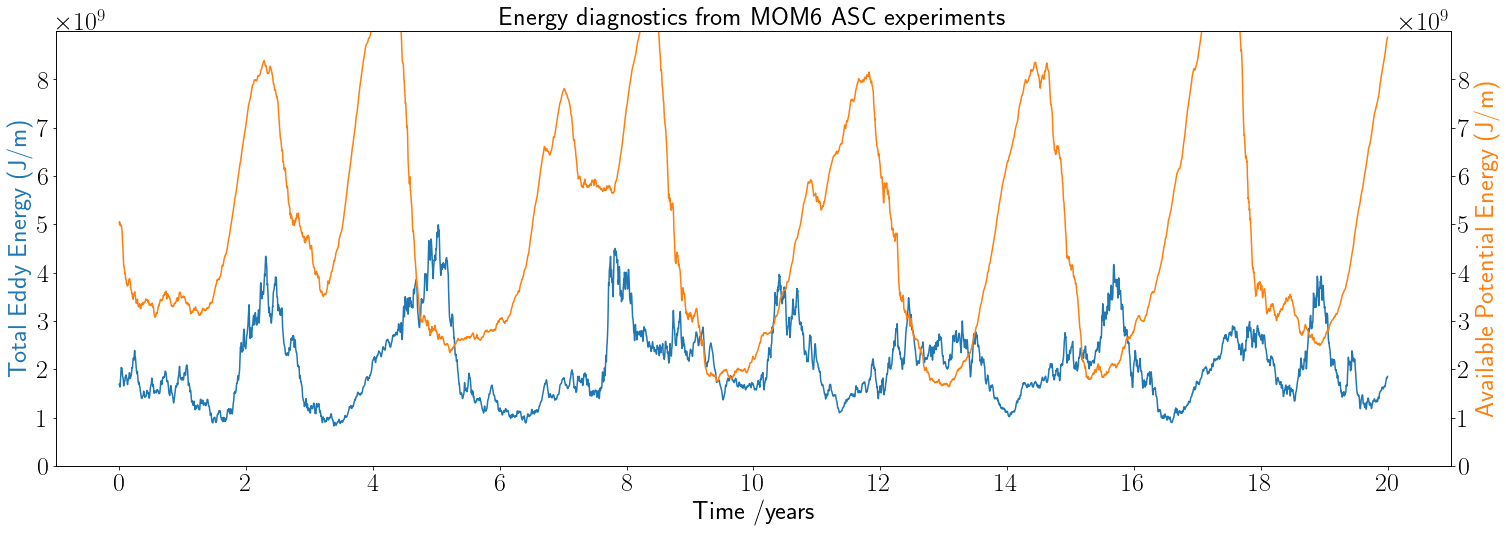

In [29]:
plt.figure(figsize = (25,8))
ax1 = plt.subplot()

ax1.plot((EKE_time.coords['Time'].values-30),EKE_time.__xarray_dataarray_variable__.values + EAPE_time.e.values, color = 'C0')
ax1.set_ylim([0,9e9])
ax1.set_ylabel('Total Eddy Energy (J/m)', color = 'C0')
ax1.set_yticks(np.arange(0,9e9,1e9))#9e9

ax2 = ax1.twinx()
ax2.plot((EKE_time.coords['Time'].values-30),APE_cdw_time.e.values, color = 'C1')
ax2.set_ylabel('Available Potential Energy (J/m)', color = 'C1')
ax2.set_ylim([0,9e9])
ax2.set_yticks(np.arange(0,9e9,1e9))
plt.xticks(np.arange(0,22,2))
ax1.set_xlabel('Time /years')
plt.title('Energy diagnostics from MOM6 ASC experiments')

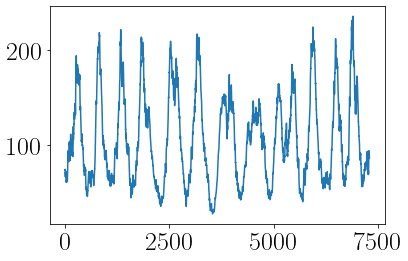

In [16]:
plt.plot(APE_cdw_time.e.values*1e6/(EKE_time.__xarray_dataarray_variable__.values + APE_time.e.values))

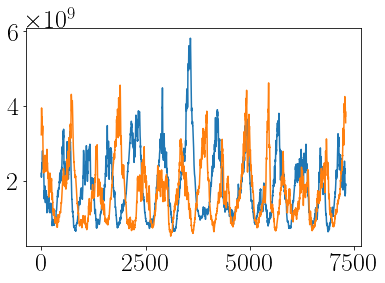

In [39]:
APE_time1 = xr.open_mfdataset('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_APE.nc')
APE_time2 = xr.open_mfdataset('4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag6p0e-03_APE.nc')
plt.plot(APE_time1.e.values)
plt.plot(APE_time2.e.values)


In [30]:
def E_equil(filename, filename_APE):
    EKE_time = xr.open_mfdataset(filename)#.drop_coords('zl')
    APE_time = xr.open_mfdataset(filename_APE)#.drop_dims('zi')
    print(APE_time)
    print(EKE_time)

    E_equil_mag = (EKE_time).mean(dim = 'Time').__xarray_dataarray_variable__.values + APE_time.mean(dim = 'Time')
    print(E_equil_mag)
    print(E_equil_mag.e.values)
    return E_equil_mag.e.values

In [91]:
fn = '/g/data/v45/qo9901/magnitude_wind_totalenergy_relsponging.nc'
ds = nc.Dataset(fn, 'w', format='NETCDF4')

In [92]:
wind_exp = ds.createDimension('wind_exp',5)
wind_exps = ds.createVariable('wind_exp', 'f4', ('wind_exp',))
value = ds.createVariable('value', 'f4', ('wind_exp',))

In [93]:
value[0] = E_equil('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau2p5e-02_sig1p0e+02.nc', '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau2p5e-02_sig1p0e+02_EAPE_cdwonly_relsponging.nc')
c.run(gc.collect)
value[1] = E_equil('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau5p0e-02_sig1p0e+02.nc', '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau5p0e-02_sig1p0e+02_EAPE_cdwonly_relsponging.nc')
c.run(gc.collect)
value[2] = E_equil('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau7p5e-03_sig1p0e+02.nc', '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_tau7p5e-03_sig1p0e+02_EAPE_cdwonly_relsponging.nc')
c.run(gc.collect)
value[3] = E_equil('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc', '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_EAPE_cdwonly_relsponging.nc')
c.run(gc.collect)
value[4] = E_equil('4layer_fresh_tau1p2e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc','4layer_fresh_tau1p2e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_EAPE_cdwonly_relsponging.nc')

<xarray.Dataset>
Dimensions:  (Time: 7300)
Coordinates:
  * Time     (Time) float64 30.0 30.0 30.01 30.01 ... 49.99 49.99 50.0 50.0
    zi       float64 ...
Data variables:
    e        (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 30.0 30.0 30.01 ... 50.0 50.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>
<xarray.Dataset>
Dimensions:  ()
Coordinates:
    zi       float64 ...
Data variables:
    e        float32 dask.array<chunksize=(), meta=np.ndarray>
850981500.0
<xarray.Dataset>
Dimensions:  (Time: 7300)
Coordinates:
  * Time     (Time) float64 20.0 20.0 20.01 20.01 ... 39.99 39.99 40.0 40.0
    zi       float64 ...
Data variables:
    e        (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>
<xarray.Dataset>
Dimensi

In [96]:
ds.close()

In [84]:
fn = '/g/data/v45/qo9901/magnitude_drag_totalenergy_relsponging.nc'
ds = nc.Dataset(fn, 'w', format='NETCDF4')

In [85]:
cdrag_exp = ds.createDimension('cdrag_exp',6)
cdrag_exps = ds.createVariable('cdrag_exp', 'f4', ('cdrag_exp',))
value = ds.createVariable('value', 'f4', ('cdrag_exp',))

In [86]:
value[0] = E_equil('4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag1p5e-03.nc', '4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag1p5e-03_EAPE_cdwonly_relsponging.nc')
c.run(gc.collect)
value[1] = E_equil('4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag2p4e-03.nc', '4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag2p4e-03_EAPE_cdwonly_relsponging.nc')
c.run(gc.collect)
value[2] = E_equil('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc', '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_EAPE_cdwonly_relsponging.nc')
c.run(gc.collect)
value[3] = E_equil('4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag3p6e-03.nc', '4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag3p6e-03_EAPE_cdwonly_relsponging.nc')
c.run(gc.collect)
value[4] = E_equil('4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag4p5e-03.nc', '4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag4p5e-03_EAPE_cdwonly_relsponging.nc')
c.run(gc.collect)
value[5] = E_equil('4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag6p0e-03.nc', '4layer_fresh_tau1p0e-01_canyonSTEEP_nDSW_sig1p0e+02_cdrag6p0e-03_EAPE_cdwonly_relsponging.nc')


<xarray.Dataset>
Dimensions:  (Time: 7300)
Coordinates:
  * Time     (Time) float64 20.0 20.0 20.01 20.01 ... 39.99 39.99 40.0 40.0
    zi       float64 ...
Data variables:
    e        (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>
<xarray.Dataset>
Dimensions:                        (Time: 7300)
Coordinates:
    zl                             float64 ...
  * Time                           (Time) float64 20.0 20.0 20.01 ... 40.0 40.0
Data variables:
    __xarray_dataarray_variable__  (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>
<xarray.Dataset>
Dimensions:  ()
Coordinates:
    zi       float64 ...
Data variables:
    e        float32 dask.array<chunksize=(), meta=np.ndarray>
1911932900.0
<xarray.Dataset>
Dimensions:  (Time: 7300)
Coordinates:
  * Time     (Time) float64 20.0 20.0 20.01 20.01 ... 39.99 39.99 40.0 40.0
    zi       float64 ...
Data variables:
    e        (Time) float32 dask.array<chunksize=(7300,), meta=np.ndarray>
<xarray.Dataset>
Dimens

In [87]:
ds.close()

In [11]:
E_drag_ds = xr.open_mfdataset('/g/data/v45/qo9901/magnitude_drag_totalenergy_relsponging.nc', combine='by_coords',  chunks={"Time": 1000},decode_times=False, engine='netcdf4', parallel=True) #, decode_times=False,
E_wind_ds = xr.open_mfdataset('/g/data/v45/qo9901/magnitude_wind_totalenergy_relsponging.nc', combine='by_coords',  chunks={"Time": 1000},decode_times=False, engine='netcdf4', parallel=True) #, decode_times=False,

In [12]:
E_drag = E_drag_ds.value.load().values
E_wind = E_wind_ds.value.load().values
